### Step 8: Overall Recommendations

In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
%matplotlib inline
cmap_bold = ListedColormap(['#00FF00','#FF0000'])
sys.path.append('../utils')
import DataAggregation as da
import AlgoUtils as au

In [3]:
algos_dd = {
    "LogisticRegression": {"C": 1e9},
    "LogisticRegressionB": {"C": 1e9, "class_weight":'balanced'},
    "KNeighborsClassifier": {"n_neighbors": 7},
    "LinearDiscriminantAnalysis": {},
    "QuadraticDiscriminantAnalysis": {},
    "SVC": {}
}

fcols = ["d_mean:d_std:d_max:l_range",
         "d_mean:d_std:l_range",
         "d_std:l_range",
         "l_range",
         "d_std",
         "d_max"]
algos_str = ["LogisticRegression", 
             "LogisticRegressionB", 
             "KNeighborsClassifier",
             "LinearDiscriminantAnalysis",
             "QuadraticDiscriminantAnalysis"]

In [4]:
a2 = da.GetFrames("../data/device_failure.csv", "a2")
a7 = da.GetFrames("../data/device_failure.csv", "a7")
a4 = da.GetFrames("../data/device_failure.csv", "a4", ldays=-30, lday_strict=False)
tdf = a2.df_sfeature.drop("failure", axis=1).join(a7.df_sfeature.drop("failure", axis=1)).join(a4.df_sfeature)

## All models and recommendations need further validation at scale!

### Model 1: Definite Action Model
### If this model detects failure, take action
#### Ofcourse still need to do validation at scale
#### See analysis in Step3_a2_analysis.ipynb, Step4_a7_analysis.ipynb for more info on why we are confident about this recommendation

In [6]:
algo_str = "QuadraticDiscriminantAnalysis"
scols = ["a2l_range", "a2d_std", "a2d_mean", "a2d_max",
         "a7l_range", "a7d_std", "a7d_mean", "a7d_max"]
analysisdf = au.do_clf_validate_new(tdf, algo_str,algos_dd[algo_str], scols, "failure")

Cross-val-score(roc_auc) = 0.74
Cross-val-score(accuracy) = 0.94
Cross-val-score(recall)   = 0.46
Cross-val-score(precision)= 0.76
Cross-val-score(f1)       = 0.76


### Model 2:
### If Model 1 does not detect failure, but this model detects failure
### Recommend Inspection of device
#### Do Hypothesis testing from field:
##### How many days to actual failure once this model detected fail
##### Refer to analysis in Step5_a4_analysis.ipynb for explanation

In [7]:
algo_str = "QuadraticDiscriminantAnalysis"
scols = tdf.columns[:-1]
analysisdf = au.do_clf_validate_new(tdf, algo_str,algos_dd[algo_str], scols, "failure")

Cross-val-score(roc_auc) = 0.78
Cross-val-score(accuracy) = 0.93
Cross-val-score(recall)   = 0.56
Cross-val-score(precision)= 0.65
Cross-val-score(f1)       = 0.65


## Data Quality Improvement Recommendations

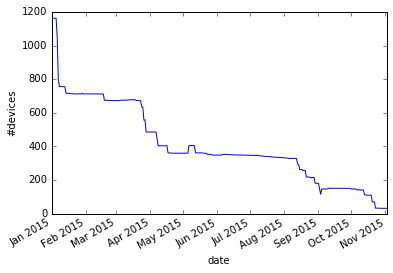

In [16]:
df = pd.read_csv("../data/device_failure.csv")
df.loc[:,'date'] = pd.to_datetime(df['date'])
df.groupby(["date"]).count()["device"].plot.line()
plt.ylabel("#devices")

#### NumDevices/day that were observed --> points to systemic ingestion/sampling problem
#### This graph should remain relatively flat over time for same number of devices that are getting monitored
#### Refer to Step1_EDA.ipynb for more information

### Other Data Engineering related recommendations
#### Possible ways to store raw and transformed (log and log differentials)
##### i.  Druid or some other timeseries databases
##### ii. Elastic / Solr (for quick exploration via Kibana/(Banana_Twigkit)
##### iii. orc/parquet in hdfs with daily partitions
###### Note in orc/parquet: Want to make sure device id be used as columns so that values for each device end up in columnar format. This makes aggregations/manipulations extremely fast.

### Thank You!
##### It was fun working on this dataset.
##### Need to be honest (to set your expectations)
###### This data challenge took me close to ~ 15 hours which includes submission time.
###### It took me good 4-6 hours or so to explore the data and just to get idea that I need to use logarithms and logarithm differentials as the values and ranges of devices were all over the place.
###### It was really when I saw the clear seperation of good vs bad devices in scatter plots that I thought I was in right path
###### I cannot wait to share these findings with my buddies over at HMS (https://www.hms-networks.com/about)
###### Also request you to read my article I just published (https://www.linkedin.com/pulse/what-fastest-sailboat-taught-me-data-science-viswanath-puttagunta)

### I look forward to the interview. My last interview with Amazon in 2012 was fantastic!